# Title: Car Evaluation Dataset Analysis using Machine Learning Techniques




# Introduction:
In this project, i will use the Decision Tree Algorithm to predict the acceptability of a car based on its attributes such as price, maintenance cost, number of doors, luggage boot size, and safety rating.I will be using the Car Evaluation Dataset obtained from UCI Machine Learning Repository.

Introduction to the Chosen Techniques: The Decision Tree algorithm is a popular classification algorithm in machine learning. It creates a tree-like model of decisions and their possible consequences. In this project, i will use the Decision Tree algorithm to predict the car's acceptability based on its attributes.

# Introduction of the Dataset:
The Car Evaluation Dataset is a multivariate dataset that contains 1728 instances with six attributes. The attributes are price, maintenance cost, number of doors, number of passengers, luggage boot size, and safety rating. The dataset is provided by UCI Machine Learning Repository.The Car Evaluation Dataset is a collection of data related to cars and their attributes. It contains 1728 instances, each representing a different car, and six attributes that describe the car's characteristics. The six attributes are:

1. Price: This is the cost of the car, which can take on four different values: "vhigh" (very high), "high", "med" (medium), and "low".
2. Maintenance cost: This attribute represents the estimated maintenance cost of the car and can take on four values as well: "vhigh", "high", "med", and "low".
3. Number of doors: This attribute represents the number of doors the car has and can take on four values: "2", "3", "4", and "5more".
4. Number of passengers: This attribute represents the number of passengers the car can accommodate and can take on four values: "2", "4", "more".
5. Luggage boot size: This attribute represents the size of the car's luggage boot and can take on three values: "small", "med", and "big".
6. Safety rating: This attribute represents the safety rating of the car and can take on three values: "low", "med", and "high".

# Input Encoding / Input Representation:
In this project, I will use one-hot encoding to represent categorical variables. One-hot encoding is a technique to convert categorical variables into numerical variables that can be used in machine learning algorithms. I will use the pandas get_dummies() function to one-hot encode the categorical variables. It refers to the process of converting the raw input data into a form that can be easily used by a machine learning algorithm. In the case of the Car Evaluation dataset, i need to convert the categorical attributes into a numerical format, as most machine learning algorithms work with numerical data.

To encode the categorical attributes, i will use a technique called one-hot encoding. One-hot encoding is a process of creating binary columns for each category of a categorical variable, where each row has a value of 0 or 1 for each category column, indicating whether or not that category is present in the input.

For example, let's consider the attribute "Price" which has four categories: "vhigh", "high", "med", and "low". To encode this attribute using one-hot encoding, i will create four new binary columns: "Price_vhigh", "Price_high", "Price_med", and "Price_low". For each instance in the dataset, only one of these columns will have a value of 1, indicating the category of the instance.

Similarly, i will apply one-hot encoding to all the categorical attributes in the dataset to convert them into a numerical format. Once the categorical attributes are encoded, i will combine them with the numerical attributes to create a final input representation for the decision tree algorithm.

# Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np; np.random.seed(42)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("car.csv")
df.head()

,buying,maint,doors,person,lug_boot,safety,Car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   person    1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Car       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.isnull()

,buying,maint,doors,person,lug_boot,safety,Car
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False


In [ ]:
#Cheeck Object data types unique value     #SS
df.select_dtypes(include='object').nunique()

buying      4
maint       4
doors       4
person      3
lug_boot    3
safety      3
Car         4
dtype: int64

In [ ]:
df.describe()

,buying,maint,doors,person,lug_boot,safety,Car
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


# Exploratory Data Analysis

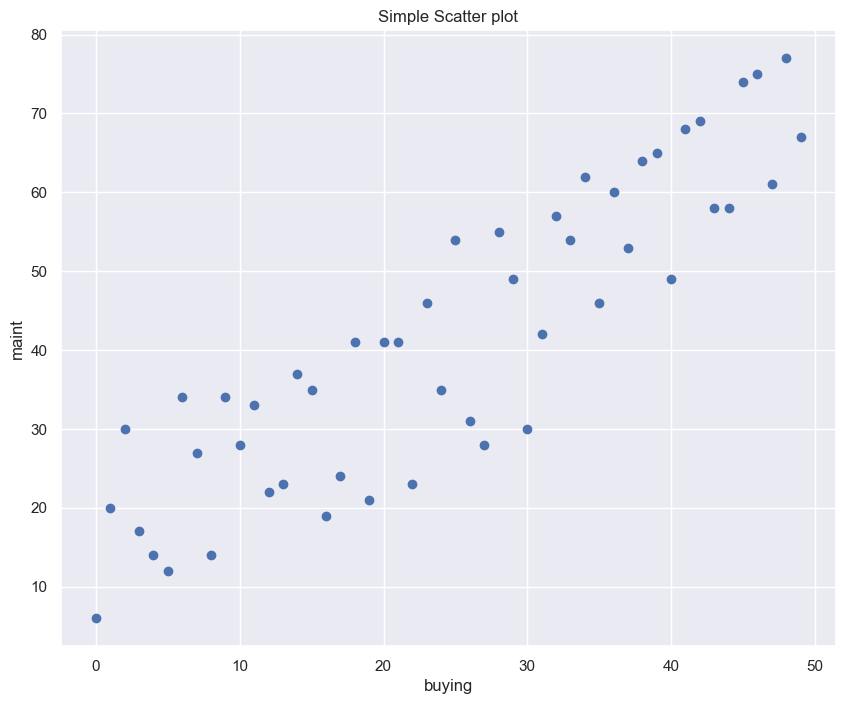

In [ ]:
import seaborn as sns
x = range(50)
y = range(50) + np.random.randint(0,30,50)
plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('buying',)
plt.ylabel('maint',)
plt.show()


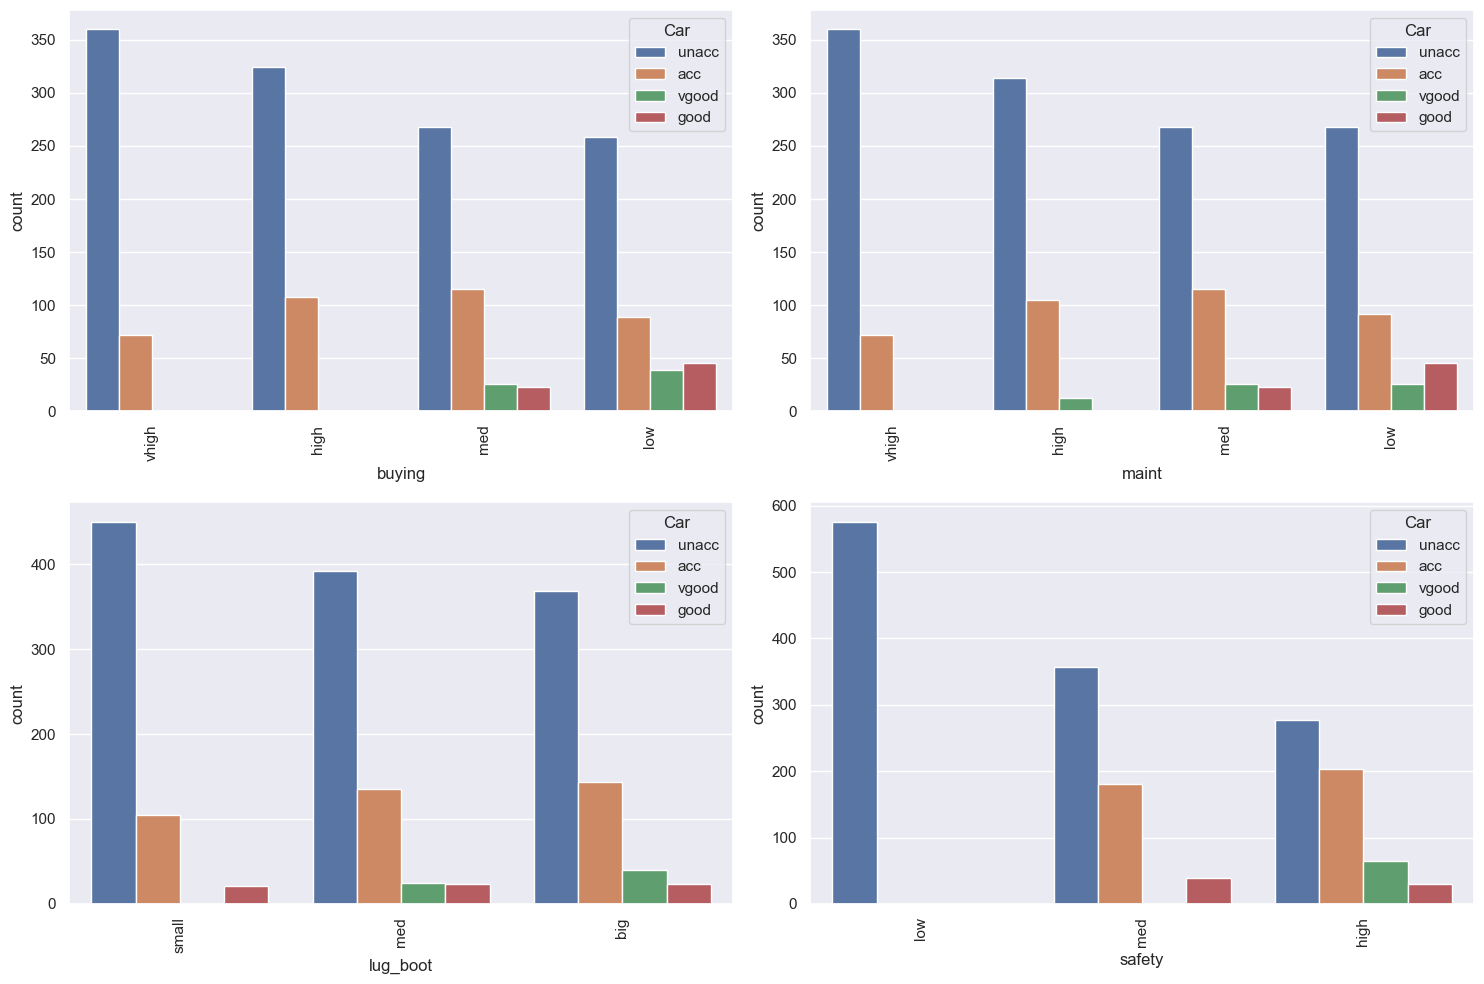

In [ ]:
# list of categorical variables to plot
cat_vars = ['buying', 'maint', 'lug_boot', 'safety']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Car', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()


# Added by SS. This code creates a figure with four subplots, each containing a bar plot of a categorical variable from a pandas DataFrame. It uses the sns.countplot() function from the seaborn library to create the bar plots and the fig.tight_layout() function to adjust the spacing between the subplots. The resulting plot is displayed using plt.show().
#Each bar plot shows the count of occurrences of each category of the categorical variable on the x-axis, with the bars colored by the different categories of the 'Car' variable. Therefore, the plot helps to visualize the distribution of the 'Car' variable across the different categories of each categorical variable.

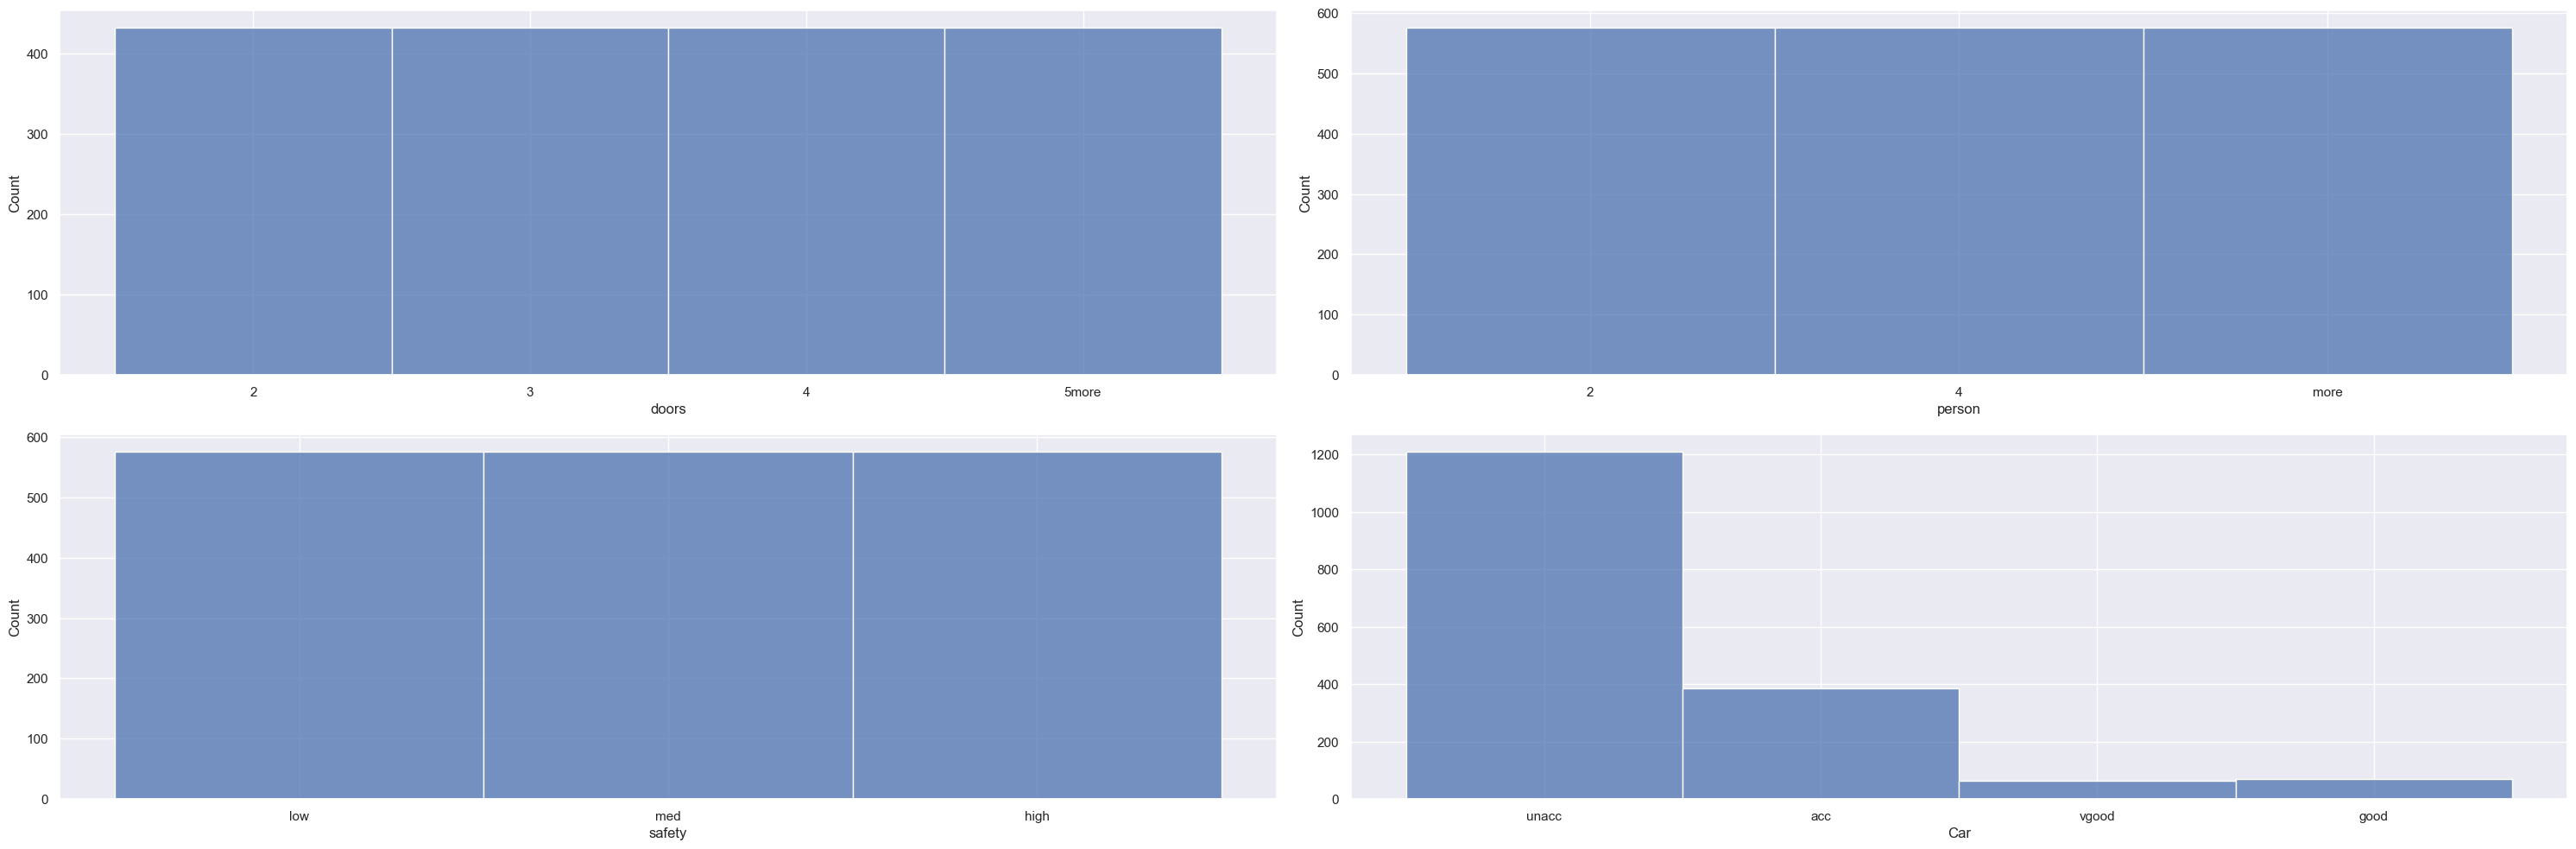

In [ ]:
num_vars = ['doors', 'person', 'safety', 'Car']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

# This code creates a figure with four subplots, each containing a histogram plot of a numerical variable from a pandas DataFrame df. The numerical variables to plot are specified in the num_vars list, and are named 'doors', 'person', 'safety', and 'Car'.

# Each histogram plot shows the distribution of the data values of the corresponding variable on the x-axis, with the count of occurrences of each value (or bin) on the y-axis. Therefore, the plot helps to visualize the frequency distribution of the data values of each numerical variable.

In [ ]:
from sklearn import preprocessing
string_to_int = preprocessing.LabelEncoder()
df = df.apply(string_to_int.fit_transform)
df

,buying,maint,doors,person,lug_boot,safety,Car
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [ ]:
features_cols = ['buying','maint','doors','person','lug_boot','safety']
X = df[features_cols]
y = df.Car
X, y

(      buying  maint  doors  person  lug_boot  safety
 0          3      3      0       0         2       1
 1          3      3      0       0         2       2
 2          3      3      0       0         2       0
 3          3      3      0       0         1       1
 4          3      3      0       0         1       2
 ...      ...    ...    ...     ...       ...     ...
 1723       1      1      3       2         1       2
 1724       1      1      3       2         1       0
 1725       1      1      3       2         0       1
 1726       1      1      3       2         0       2
 1727       1      1      3       2         0       0
 
 [1728 rows x 6 columns],
 0       2
 1       2
 2       2
 3       2
 4       2
        ..
 1723    1
 1724    3
 1725    2
 1726    1
 1727    3
 Name: Car, Length: 1728, dtype: int32)

# Visualization of the correlation matrix between the features in the car evaluation dataset using a heatmap

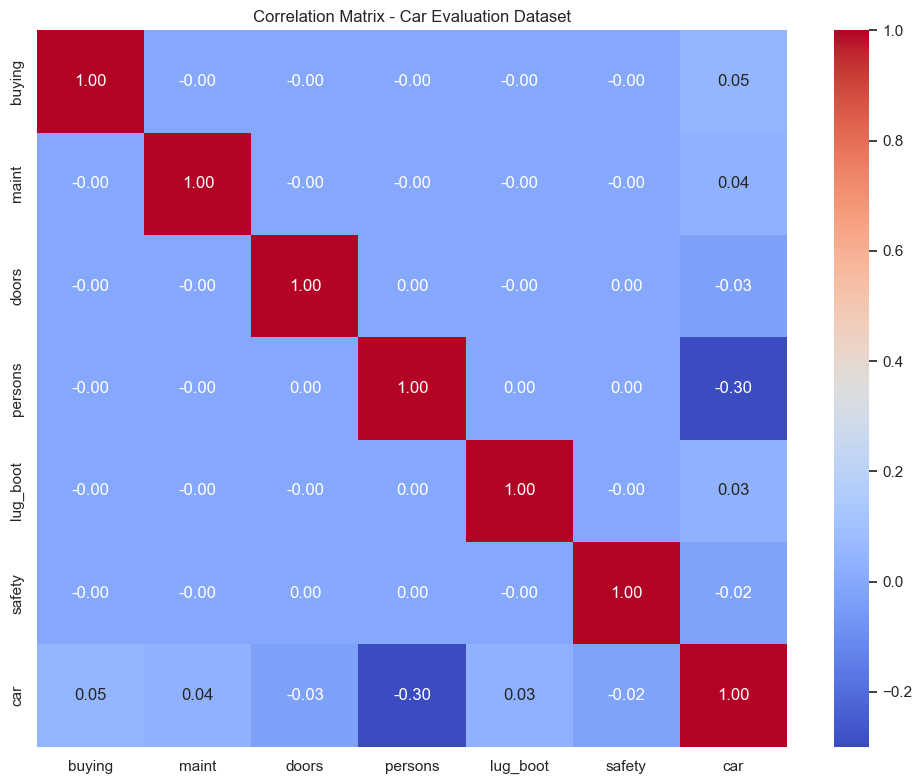

In [ ]:
# Assign column names to the dataframe
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car']

# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Customize the plot
plt.title('Correlation Matrix - Car Evaluation Dataset')
plt.tight_layout()
plt.show()

# Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state= 14)

In [ ]:
X_train

,buying,maint,doors,person,lug_boot,safety
118,3,0,0,1,2,2
945,2,3,3,0,2,1
1689,1,1,2,1,0,1
343,3,1,0,2,2,2
978,2,0,0,0,0,1
...,...,...,...,...,...,...
327,3,1,0,0,1,1
406,3,1,3,0,2,2
1292,2,1,3,2,1,0
1368,1,3,2,2,2,1


In [ ]:
X_test

,buying,maint,doors,person,lug_boot,safety
1549,1,2,1,1,2,2
170,3,0,2,0,0,0
248,3,2,1,0,1,0
1346,1,3,1,2,1,0
1339,1,3,1,1,0,2
...,...,...,...,...,...,...
1116,2,2,1,1,2,1
828,0,1,2,2,2,1
1720,1,1,3,2,2,2
1635,1,1,0,1,0,1


In [ ]:
y_train

118     2
945     2
1689    2
343     2
978     2
       ..
327     2
406     2
1292    3
1368    2
619     0
Name: Car, Length: 1209, dtype: int32

In [ ]:
y_test

1549    0
170     2
248     2
1346    0
1339    0
       ..
1116    2
828     2
1720    0
1635    2
1487    2
Name: Car, Length: 519, dtype: int32

# Prepruning and Decision Tree Implementation



In [ ]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeClassifier()
cv=GridSearchCV(DT,param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
cv.fit(X_train,y_train)


C:\Users\Sharmila Shrestha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sharmila Shrestha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sharmila Shrestha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Sharmila Shrestha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyErr

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
y_pred=cv.predict(X_test)
y_pred

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2,

In [ ]:
acc_tree = round(cv.score(X_train, y_train)*100, 2)
acc_tree

75.68

In [ ]:
data_p = pd.DataFrame({'Actual':y_test,'Predict': y_pred})
data_p

,Actual,Predict
1549,0,2
170,2,2
248,2,2
1346,0,0
1339,0,2
...,...,...
1116,2,2
828,2,2
1720,0,2
1635,2,2


In [ ]:
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(y_pred,y_test))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       120
           1       0.00      0.00      0.00         0
           2       0.92      0.81      0.87       399
           3       0.00      0.00      0.00         0

    accuracy                           0.74       519
   macro avg       0.35      0.33      0.34       519
weighted avg       0.82      0.74      0.78       519



C:\Users\Sharmila Shrestha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sharmila Shrestha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sharmila Shrestha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5086206896551724, 0.9166666666666666, 'X[3] <= 0.5\nentropy = 1.192\nsamples = 1209\nvalue = [256, 48, 858, 47]'),
 Text(0.47413793103448276, 0.75, 'entropy = 0.0\nsamples = 413\nvalue = [0, 0, 413, 0]'),
 Text(0.5431034482758621, 0.75, 'X[4] <= 1.5\nentropy = 1.481\nsamples = 796\nvalue = [256, 48, 445, 47]'),
 Text(0.27586206896551724, 0.5833333333333334, 'X[2] <= 1.5\nentropy = 1.591\nsamples = 531\nvalue = [188, 33, 263, 47]'),
 Text(0.13793103448275862, 0.4166666666666667, 'X[5] <= 0.5\nentropy = 1.526\nsamples = 266\nvalue = [93, 16, 139, 18]'),
 Text(0.06896551724137931, 0.25, 'X[0] <= 2.5\nentropy = 1.683\nsamples = 94\nvalue = [49, 6, 21, 18]'),
 Text(0.034482758620689655, 0.08333333333333333, 'entropy = 1.643\nsamples = 67\nvalue = [36, 6, 7, 18]'),
 Text(0.10344827586206896, 0.08333333333333333, 'entropy = 0.999\nsamples = 27\nvalue = [13, 0, 14, 0]'),
 Text(0.20689655172413793, 0.25, 'X[4] <= 0.5\nentropy = 1.115\nsamples = 172\nvalue = [44, 10, 118, 0]'),
 Text(0.1

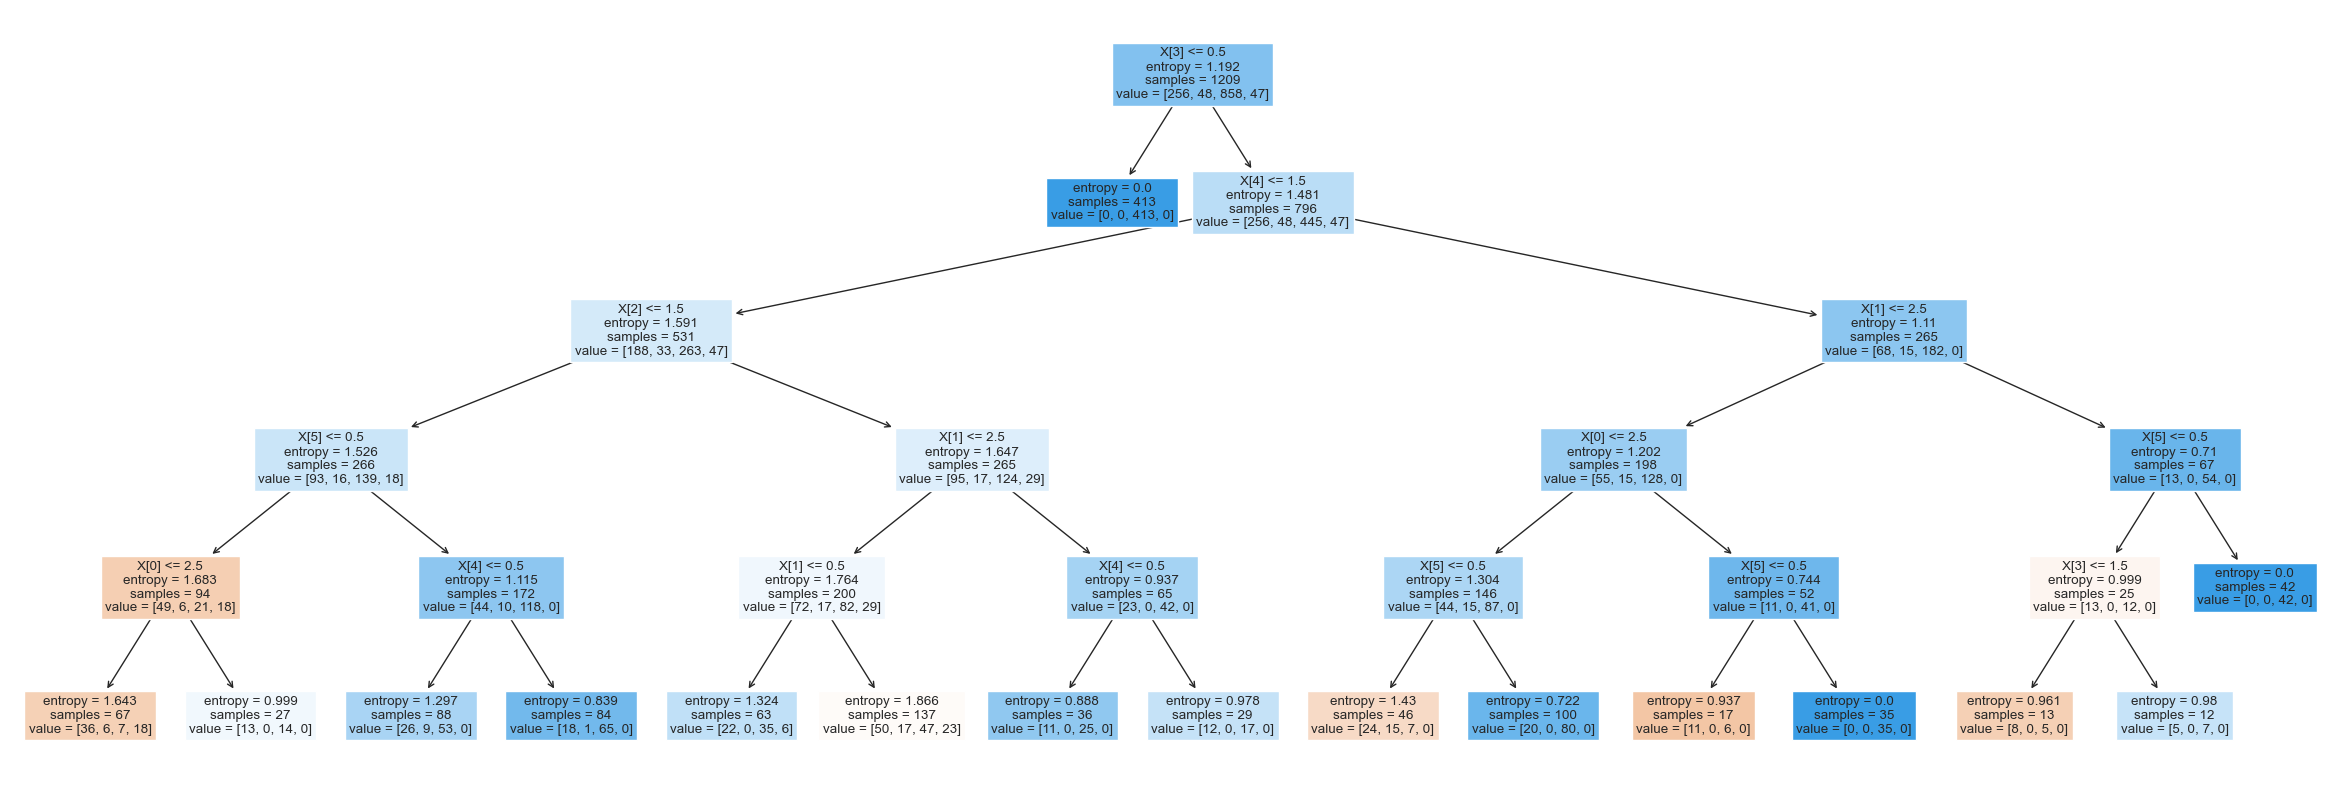

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
best_model = cv.best_estimator_
plot_tree(best_model, filled=True)